# Проект "Авиарейсы без потерь"

## Описание данных
| ## | Column Name      | Type.    | Description |
| -: | ---------------- |----------| :---------------- |
| 0  | flight_id        | int64    | Иденификатор рейса |
| 1  | flight_no        | object   | Номер рейса |
| 2  | arrival_airport  | object   | Аэропорт прибытия |
| 3  | longitude        | float64  | Координаты аэропорта (долгота) |
| 4  | latitude         | float64  | Координаты аэропорта (широта) |
| 5  | model            | object   | Модель самолёта |
| 6  | actual_arrival   | object   | Фактическое время прилёта |
| 7  | actual_departure | object   | Фактическое время вылёта |
| 8  | fare_economy     | int64    | Кол-во проданных билетов кл.“Эконом” |
| 9  | fare_comfort     | int64    | Кол-во проданных билетов кл.“Комфорт” |
| 10 | fare_business    | int64    | Кол-во проданных билетов кл.“Бизнес” |
| 11 | total_sold       | int64    | Общее кол-во проданных билетов |
| 12 | plane_capacity   | int64    | Максимальная загрузка самолёта |
| 13 | flight_duration  | float64  | Продолжительность полёта в мин. |
| 14 | total_amount     | float64  | Суммарная выручка от продажи билетов |

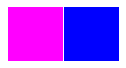

In [41]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, radians, asin

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')
%matplotlib inline


# Определяем цвета для разных графиков
colors = ['Magenta', 'Blue']
sns.palplot(sns.color_palette(colors))

# Первичный анализ данных

In [42]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

flights = pd.read_csv('module_4.csv')
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_comfort,fare_business,total_sold,plane_capacity,flight_duration,total_amount
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01T10:17:00Z,2017-01-01T09:27:00Z,84,0,12,96,97,50.0,759000.0
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01T11:47:00Z,2017-01-01T10:09:00Z,93,0,11,104,130,98.0,1542000.0
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02T10:18:00Z,2017-01-02T09:28:00Z,73,0,9,82,97,50.0,632400.0
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02T11:46:00Z,2017-01-02T10:07:00Z,101,0,9,110,130,99.0,1568800.0
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03T10:19:00Z,2017-01-03T09:29:00Z,72,0,9,81,97,50.0,626100.0


In [43]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         118 non-null    int64  
 1   flight_no         118 non-null    object 
 2   arrival_airport   118 non-null    object 
 3   longitude         118 non-null    float64
 4   latitude          118 non-null    float64
 5   model             118 non-null    object 
 6   actual_arrival    118 non-null    object 
 7   actual_departure  118 non-null    object 
 8   fare_economy      118 non-null    int64  
 9   fare_comfort      118 non-null    int64  
 10  fare_business     118 non-null    int64  
 11  total_sold        118 non-null    int64  
 12  plane_capacity    118 non-null    int64  
 13  flight_duration   118 non-null    float64
 14  total_amount      118 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 14.0+ KB


## fare_comfort колонка
Можно избавиться от оной, так как в данной колонку содержаться одни нули

In [45]:
flights.fare_comfort.value_counts()

0    118
Name: fare_comfort, dtype: int64

In [46]:
flights = flights.drop(['fare_comfort'], axis = 1)
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01T10:17:00Z,2017-01-01T09:27:00Z,84,12,96,97,50.0,759000.0
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01T11:47:00Z,2017-01-01T10:09:00Z,93,11,104,130,98.0,1542000.0
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02T10:18:00Z,2017-01-02T09:28:00Z,73,9,82,97,50.0,632400.0
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02T11:46:00Z,2017-01-02T10:07:00Z,101,9,110,130,99.0,1568800.0
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03T10:19:00Z,2017-01-03T09:29:00Z,72,9,81,97,50.0,626100.0


## actual_departure & actual_arrival

Конвертируем данные в datetime чтобы было удубнее работать
Так-же добовляем колонку дня недели DOW - 'Day Of the Week' - может пригодиться для дальнейшего анализа

In [48]:
flights['actual_departure'] = pd.to_datetime(flights.actual_departure)
flights['actual_arrival'] = pd.to_datetime(flights.actual_arrival)
flights['dow'] = flights.actual_departure.dt.dayofweek
flights['flight_month'] = flights.actual_departure.apply(lambda x: x.month)
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01 10:17:00+00:00,2017-01-01 09:27:00+00:00,84,12,96,97,50.0,759000.0,6,1
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01 11:47:00+00:00,2017-01-01 10:09:00+00:00,93,11,104,130,98.0,1542000.0,6,1
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02 10:18:00+00:00,2017-01-02 09:28:00+00:00,73,9,82,97,50.0,632400.0,0,1
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02 11:46:00+00:00,2017-01-02 10:07:00+00:00,101,9,110,130,99.0,1568800.0,0,1
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03 10:19:00+00:00,2017-01-03 09:29:00+00:00,72,9,81,97,50.0,626100.0,1,1


In [51]:
# Дополнительные данные
# Расчётный расход топлива, кг/ч
fuel_consumption = {'Boeing 737-300': 2600, 
                    'Sukhoi Superjet-100':1700}

# Стоимость ТС-1 (авиационный керосин) в зимние месяцы 2017 года (без НДС), руб/т в аэропорту Анапы
# Источник: https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329
fuel_price = {1: 41435, 2:39553, 12:47101}

# Расчет цены авивтоплива за полет
def fuel_cost(row):
    flight_time = row['flight_duration']/60       # время полёта в часах
    fuel_cost_per_kg = row['fuel_price']/1000  # стоимость топлива в кг
    fuel_consumption = row['fuel_consumption'] 
    return round(flight_time * fuel_cost_per_kg * fuel_consumption, 2)

flights['fuel_consumption'] = flights.model.map(fuel_consumption)
flights['fuel_price'] = flights.flight_month.map(fuel_price)
flights['fuel_cost'] = flights.apply (lambda row: fuel_cost(row), axis=1)
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month,fuel_consumption,fuel_price,fuel_cost
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01 10:17:00+00:00,2017-01-01 09:27:00+00:00,84,12,96,97,50.0,759000.0,6,1,1700,41435,58699.58
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01 11:47:00+00:00,2017-01-01 10:09:00+00:00,93,11,104,130,98.0,1542000.0,6,1,2600,41435,175960.63
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02 10:18:00+00:00,2017-01-02 09:28:00+00:00,73,9,82,97,50.0,632400.0,0,1,1700,41435,58699.58
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02 11:46:00+00:00,2017-01-02 10:07:00+00:00,101,9,110,130,99.0,1568800.0,0,1,2600,41435,177756.15
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03 10:19:00+00:00,2017-01-03 09:29:00+00:00,72,9,81,97,50.0,626100.0,1,1,1700,41435,58699.58


Text(0.5, 0, 'total_amount')

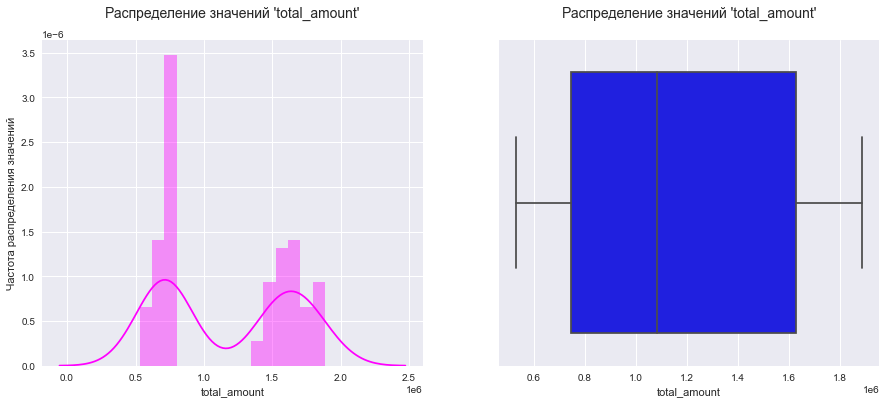

In [24]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.distplot(flights.total_amount.values, bins=15, color=colors[0])
plt.title("Распределение значений 'total_amount'\n", fontsize=14)
plt.xlabel("total_amount")
plt.ylabel("Частота распределения значений")

plt.subplot(122)
sns.boxplot(flights.total_amount.values, color=colors[1])
plt.title("Распределение значений 'total_amount'\n", fontsize=14)
plt.xlabel("total_amount")